# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [148]:
import os

In [149]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기




### 문제 2. 데이터 다운로드 및 압축 해제하기


In [150]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기





### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [151]:
df = pd.read_csv('vehicles.csv', encoding='utf-8', index_col=0)
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,6 cylinders,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,4 cylinders,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,8 cylinders,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [152]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.isnull().sum()
# df.isnull()
df.columns
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url',
         'description', 'state', 'lat', 'long', 'posting_date'], axis=1, inplace=True)

### 문제 5. 범주형 데이터의 통계 분석하기


In [153]:
# df['age'] = 2021-df['year']
# df.drop('year', axis=1, inplace=True)
df
# 범주형 데이터의 값의 범위, 기초 통계 분석하기
df.columns
df['manufacturer'].nunique()
df['manufacturer'].unique()
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


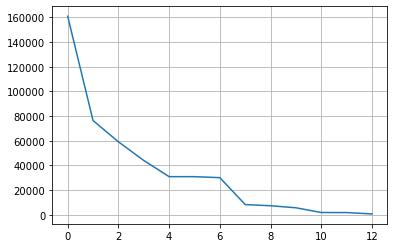

In [191]:
# 너무 많은 카테고리 정리
col='paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [180]:
df.drop('title_status', axis=1, inplace=True)

In [192]:
n_categorical = 7
counts.index[n_categorical:]
# 리스트가 클 때 속도가 느림, others라는 변수를 만듦으로써 성능 개선
others = counts.index[n_categorical:]
df.loc[df[col]=='other']='others'
df[col] = df[col].apply(lambda s:s if str(s) not in others else 'others')
df[col].value_counts()

white     76394
black     59161
others    49942
silver    44034
blue      30916
red       30916
grey      30116
Name: paint_color, dtype: int64

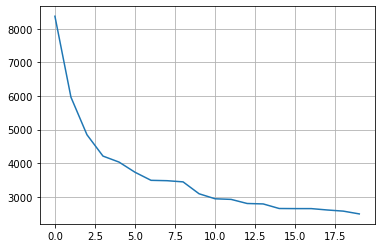

In [167]:
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

### 문제 6. 수치형 데이터의 통계 분석하기

In [154]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기






## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

In [101]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기


region               0
price                0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
age               1050
dtype: int64

### 문제 8. 범주형 데이터 클리닝하기

In [ ]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
df.isnull().sum()
df.drop('size', axis=1, inplace=True)






### 문제 9. 수치형 데이터 시각화하여 분석하기

TypeError: 'value' must be an instance of str or bytes, not a float

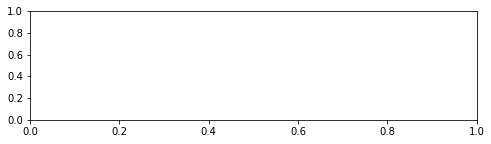

In [197]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='odometer', data=df, height=1)



### 문제 10. 수치형 데이터 클리닝하기

In [209]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기
# df.loc[df['price']=='others'] = 0
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.13)
print(p1,p2)

58950.0 178.56000000000495


In [213]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

268000.0 6644.0


In [215]:
df = df[(p1>df['price']) & (df['price'] > p2)]
df = df[(p1>df['odometer']) & (df['odometer'] > p2)]

In [225]:
# plt.boxplot(x='manufacturer',y='price',  data = df)
df.corr()

""


### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기

In [234]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [236]:
from sklearn.preprocessing import StandardScaler
x_num = df[['odometer','year']]
scaler = StandardScaler()
scaler.fit(x_num)
x_scaled = scaler.transform((x_num))
x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns=x_num.columns)

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num =

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat =

# 입출력 데이터 통합하기
X = 
y = 

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = 




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용






### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test




In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('bigdata/mtcars.csv', encoding='utf-8', index_col=0)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [44]:
aa = MinMaxScaler()
aa.fit(df)

MinMaxScaler()

In [40]:
print('Min : ',df['qsec'].min(), 'Max :', df['qsec'].max())

Min :  14.5 Max : 22.9


In [41]:
for i in range(len(df)):
    # print(df['qsec'][i])
    min_max = (df['qsec'][i]-df['qsec'].min())/(df['qsec'].max() - df['qsec'].min())
    df['qsec'][i] = min_max
df

D:\Program\Anaconda\envs\myplace\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,0.233333,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0.740588,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,0.810735,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,0.847353,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0.740588,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,0.881765,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,0.688529,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,0.872059,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,1.000000,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,0.913534,1,0,4,4


In [42]:
df[df['qsec']>0.5]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0.740588,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,0.810735,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,0.847353,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0.740588,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,0.881765,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,0.688529,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,0.872059,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,1.000000,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,0.913534,1,0,4,4
Merc 280C,17.8,6,167.6,123,3.92,3.440,0.943873,1,0,4,4


In [ ]:
df.iloc['qsec',0]

In [47]:
mtcars_df = pd.read_csv('bigdata/mtcars.csv')

mtcars_num_df = mtcars_df.iloc[:, 1:]
mtcars_num_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [48]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

scaler.fit(mtcars_num_df)

mtcars_scaled_df = pd.DataFrame(scaler.transform(mtcars_num_df), columns=mtcars_num_df.columns)


In [49]:
mtcars_scaled_df


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
1,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
2,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
3,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
4,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857
5,0.327660,0.5,0.383886,0.187279,0.000000,0.497827,0.680952,1.0,0.0,0.0,0.000000
6,0.165957,1.0,0.720629,0.681979,0.207373,0.525952,0.159524,0.0,0.0,0.0,0.428571
7,0.595745,0.0,0.188576,0.035336,0.428571,0.428791,0.654762,1.0,0.0,0.5,0.142857
8,0.527660,0.0,0.173859,0.151943,0.534562,0.418563,1.000000,1.0,0.0,0.5,0.142857
9,0.374468,0.5,0.240708,0.250883,0.534562,0.492713,0.452381,1.0,0.0,0.5,0.428571


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [24]:
x_train = pd.read_csv('data/X_train.csv',encoding='euc-kr')
y_train = pd.read_csv('data/Y_train.csv', encoding='euc-kr')
x_test = pd.read_csv('data/X_test.csv', encoding ='euc-kr')
x_train, x_test, y_train

(      cust_id       총구매액     최대구매액       환불금액   주구매상품 주구매지점  내점일수   내점당구매건수  \
 0           0   68282840  11264000  6860000.0      기타   강남점    19  3.894737   
 1           1    2136000   2136000   300000.0     스포츠   잠실점     2  1.500000   
 2           2    3197000   1639000        NaN  남성 캐주얼   관악점     2  2.000000   
 3           3   16077620   4935000        NaN      기타   광주점    18  2.444444   
 4           4   29050000  24000000        NaN      보석  본  점     2  1.500000   
 ...       ...        ...       ...        ...     ...   ...   ...       ...   
 3495     3495    3175200   3042900        NaN      골프  본  점     1  2.000000   
 3496     3496   29628600   7200000  6049600.0    시티웨어  부산본점     8  1.625000   
 3497     3497      75000     75000        NaN    주방용품   창원점     1  1.000000   
 3498     3498    1875000   1000000        NaN     화장품  본  점     2  1.000000   
 3499     3499  263101550  34632000  5973000.0      기타  본  점    38  2.421053   
 
         주말방문비율  구매주기  
 0     0.52702

In [37]:
df = pd.concat([x_train, y_train], join='inner', axis=1)
df

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,cust_id,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,2,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,3,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,3495,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,3496,1
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,3497,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,3498,0


In [39]:
df.drop('cust_id', axis=1,inplace=True)
df

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,1
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,0
3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,0


In [42]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총구매액     3500 non-null   int64  
 1   최대구매액    3500 non-null   int64  
 2   환불금액     3500 non-null   float64
 3   주구매상품    3500 non-null   object 
 4   주구매지점    3500 non-null   object 
 5   내점일수     3500 non-null   int64  
 6   내점당구매건수  3500 non-null   float64
 7   주말방문비율   3500 non-null   float64
 8   구매주기     3500 non-null   int64  
 9   gender   3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [48]:
df['주구매상품'] = df['주구매상품'].factorize()[0]
df['주구매지점'] = df['주구매지점'].factorize()[0]
df

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,68282840,11264000,6860000.0,0,0,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,1,1,2,1.500000,0.000000,1,0
2,3197000,1639000,0.0,2,2,2,2.000000,0.000000,1,1
3,16077620,4935000,0.0,0,3,18,2.444444,0.318182,16,1
4,29050000,24000000,0.0,3,4,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,9,4,1,2.000000,1.000000,0,1
3496,29628600,7200000,6049600.0,5,7,8,1.625000,0.461538,40,1
3497,75000,75000,0.0,24,17,1,1.000000,0.000000,0,0
3498,1875000,1000000,0.0,8,4,2,1.000000,0.000000,39,0


In [49]:
df.corr()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
총구매액,1.000000,0.700080,0.467686,-0.187768,-0.023123,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,0.700080,1.000000,0.429504,-0.127166,-0.013649,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.467686,0.429504,1.000000,-0.101687,0.002880,0.377570,-0.003871,-0.024707,-0.137362,-0.114327
주구매상품,-0.187768,-0.127166,-0.101687,1.000000,-0.011941,-0.236021,-0.198836,0.052064,0.054406,0.104249
주구매지점,-0.023123,-0.013649,0.002880,-0.011941,1.000000,0.027930,0.086392,0.012846,-0.013241,0.024346
내점일수,0.659084,0.374147,0.377570,-0.236021,0.027930,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,0.090022,0.018980,-0.003871,-0.198836,0.086392,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.014396,0.022277,-0.024707,0.052064,0.012846,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,-0.212944,-0.115837,-0.137362,0.054406,-0.013241,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.150141,-0.114323,-0.114327,0.104249,0.024346,-0.155000,-0.043917,0.073598,0.041450,1.000000


In [51]:
df.describe()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
count,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,9.191925e+07,1.966424e+07,8.289786e+06,9.764857,5.781714,19.253714,2.834963,0.307246,20.958286,0.376000
std,1.635065e+08,3.199235e+07,3.010204e+07,8.208025,4.101569,27.174942,1.912368,0.289752,24.748682,0.484449
min,-5.242152e+07,-2.992000e+06,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.747050e+06,2.875000e+06,0.000000e+00,4.000000,4.000000,2.000000,1.666667,0.027291,4.000000,0.000000
50%,2.822270e+07,9.837000e+06,0.000000e+00,8.000000,4.000000,8.000000,2.333333,0.256410,13.000000,0.000000
75%,1.065079e+08,2.296250e+07,2.642250e+06,12.000000,8.000000,25.000000,3.375000,0.448980,28.000000,1.000000
max,2.323180e+09,7.066290e+08,5.637530e+08,41.000000,23.000000,285.000000,22.083333,1.000000,166.000000,1.000000


In [72]:
df = df[df['총구매액']>0]
df

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,68282840,11264000,6860000.0,0,0,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,1,1,2,1.500000,0.000000,1,0
2,3197000,1639000,0.0,2,2,2,2.000000,0.000000,1,1
3,16077620,4935000,0.0,0,3,18,2.444444,0.318182,16,1
4,29050000,24000000,0.0,3,4,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,9,4,1,2.000000,1.000000,0,1
3496,29628600,7200000,6049600.0,5,7,8,1.625000,0.461538,40,1
3497,75000,75000,0.0,24,17,1,1.000000,0.000000,0,0
3498,1875000,1000000,0.0,8,4,2,1.000000,0.000000,39,0


In [125]:
x_train, x_valid, y_train, y_valid = train_test_split(df.iloc[:,:-1], df['gender'], test_size=0.05, shuffle=True, stratify=df['gender'], random_state=43)

In [118]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3315, 9), (175, 9), (3315,), (175,))

In [119]:
#Logistic(Regression)Classifier

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_valid)
x_valid_scaled = scaler.transform(x_valid)

In [120]:
model_lr = LogisticRegression()
model_lr.fit(x_train_scaled , y_train)
predict_proba_lr = model_lr.predict_proba(x_valid_scaled)

In [121]:
print("Logistic Classifier", "'s ROC AUC is ", roc_auc_score(y_valid, predict_proba_lr[:, 1]))

Logistic Classifier 's ROC AUC is  0.6198220739505143


In [129]:
model_lr = LogisticRegression()
model_lr.fit(x_train , y_train)
predict_proba_lr = model_lr.predict_proba(x_valid)
print("Logistic Classifier", "'s ROC AUC is ", roc_auc_score(y_valid, predict_proba_lr[:, 1]))



Logistic Classifier 's ROC AUC is  0.6569363358354184


In [128]:
x_train.drop('최대구매액',axis=1, inplace=True)
x_train
x_valid.drop('최대구매액',axis=1, inplace=True)
x_valid

,총구매액,환불금액,주구매상품,내점일수,내점당구매건수,주말방문비율,구매주기
1898,303899920,10545000.0,8,83,1.843373,0.209150,4
3217,13526150,1875000.0,30,5,1.600000,0.625000,37
2312,5692920,0.0,16,7,2.000000,0.500000,42
1477,380000,0.0,22,1,2.000000,1.000000,0
3075,80002880,32845000.0,5,11,2.727273,0.100000,24
...,...,...,...,...,...,...,...
1946,462409540,130358000.0,9,44,2.431818,0.112150,7
1061,391084450,62952900.0,36,32,1.750000,0.446429,10
535,1008700,0.0,12,3,1.666667,0.000000,28
1016,111921630,6800000.0,7,48,12.145833,0.902230,7


In [135]:
predict_proba_lr

array([[0.7491982 , 0.2508018 ],
       [0.51509503, 0.48490497],
       [0.50471416, 0.49528584],
       [0.50031468, 0.49968532],
       [0.6313879 , 0.3686121 ],
       [0.91866269, 0.08133731],
       [0.57689856, 0.42310144],
       [0.50092747, 0.49907253],
       [0.64236502, 0.35763498],
       [0.5000087 , 0.4999913 ],
       [0.50614255, 0.49385745],
       [0.50444512, 0.49555488],
       [0.50628645, 0.49371355],
       [0.50347067, 0.49652933],
       [0.53030579, 0.46969421],
       [0.6515619 , 0.3484381 ],
       [0.54441598, 0.45558402],
       [0.50671979, 0.49328021],
       [0.67249083, 0.32750917],
       [0.58799189, 0.41200811],
       [0.51987128, 0.48012872],
       [0.5255884 , 0.4744116 ],
       [0.793081  , 0.206919  ],
       [0.50056518, 0.49943482],
       [0.7294066 , 0.2705934 ],
       [0.50015949, 0.49984051],
       [0.86226441, 0.13773559],
       [0.54839795, 0.45160205],
       [0.5162402 , 0.4837598 ],
       [0.50387708, 0.49612292],
       [0.

In [146]:
x_test
x_test['주구매상품'].factorize()[0].reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       ...,
       [16],
       [24],
       [ 2]], dtype=int64)